In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/DEFENCE/Dataset/pollutants-and-air-quality-data.csv')

In [ ]:
df.head()

,Organisation,Device name,datetime,Device ID,PM1 (µg/m³),PM25 (µg/m³),PM10 (µg/m³),Temperature (°C),NO2 (ppb),CO (ppb),O3 (ppb),AQI PM10,AQI PM25,AQI NO2,AQI O3,AQI CO,AQI Max,Geolocation
0,Campbelltown City Council,"Oxford St, Ingleburn ems-16ea",2022-12-29T00:48:03+06:00,eui-0004a30b002716ea,2.0,4.0,4.0,21.6,26.658818,140.609913,8.196978,4.0,17.0,25.0,0.0,1.0,25.0,"-33.998172, 150.865419"
1,Campbelltown City Council,"Oxford St, Ingleburn ems-16ea",2023-03-09T02:47:13+06:00,eui-0004a30b002716ea,1.0,1.0,2.0,20.5,12.881451,788.777520,5.261750,2.0,4.0,11.0,0.0,8.0,11.0,"-33.998172, 150.865419"
2,Campbelltown City Council,"Oxford St, Ingleburn ems-16ea",2022-12-29T00:28:03+06:00,eui-0004a30b002716ea,4.0,7.0,10.0,21.6,26.658818,227.609913,8.196978,9.0,29.0,25.0,0.0,2.0,29.0,"-33.998172, 150.865419"
3,Campbelltown City Council,"Oxford St, Ingleburn ems-16ea",2023-03-09T02:37:13+06:00,eui-0004a30b002716ea,0.0,1.0,1.0,19.8,7.128538,677.701152,3.116182,1.0,4.0,7.0,0.0,7.0,7.0,"-33.998172, 150.865419"
4,Campbelltown City Council,"Oxford St, Ingleburn ems-16ea",2022-12-29T00:18:03+06:00,eui-0004a30b002716ea,3.0,5.0,5.0,21.6,26.658818,140.609913,3.196978,5.0,21.0,25.0,0.0,1.0,25.0,"-33.998172, 150.865419"


In [ ]:
df.shape

(189635, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189635 entries, 0 to 189634
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Organisation      189635 non-null  object 
 1   Device name       189635 non-null  object 
 2   datetime          189635 non-null  object 
 3   Device ID         189635 non-null  object 
 4   PM1 (µg/m³)       189635 non-null  float64
 5   PM25 (µg/m³)      189635 non-null  float64
 6   PM10 (µg/m³)      189635 non-null  float64
 7   Temperature (°C)  189635 non-null  float64
 8   NO2 (ppb)         183340 non-null  float64
 9   CO (ppb)          187146 non-null  float64
 10  O3 (ppb)          182531 non-null  float64
 11  AQI PM10          176087 non-null  float64
 12  AQI PM25          176087 non-null  float64
 13  AQI NO2           176087 non-null  float64
 14  AQI O3            176087 non-null  float64
 15  AQI CO            176087 non-null  float64
 16  AQI Max           17

In [ ]:
df.isnull().sum()

Organisation            0
Device name             0
datetime                0
Device ID               0
PM1 (µg/m³)             0
PM25 (µg/m³)            0
PM10 (µg/m³)            0
Temperature (°C)        0
NO2 (ppb)            6295
CO (ppb)             2489
O3 (ppb)             7104
AQI PM10            13548
AQI PM25            13548
AQI NO2             13548
AQI O3              13548
AQI CO              13548
AQI Max             13548
Geolocation             0
dtype: int64

In [ ]:
df.drop(['Organisation', 'datetime', 'Device ID', 'Device name', 'PM1 (µg/m³)', 'AQI PM10', 'AQI PM25', 'AQI NO2', 'AQI O3', 'AQI CO', 'Geolocation'], axis=1, inplace=True)
df.head()

,PM25 (µg/m³),PM10 (µg/m³),Temperature (°C),NO2 (ppb),CO (ppb),O3 (ppb),AQI Max
0,4.0,4.0,21.6,26.658818,140.609913,8.196978,25.0
1,1.0,2.0,20.5,12.881451,788.777520,5.261750,11.0
2,7.0,10.0,21.6,26.658818,227.609913,8.196978,29.0
3,1.0,1.0,19.8,7.128538,677.701152,3.116182,7.0
4,5.0,5.0,21.6,26.658818,140.609913,3.196978,25.0


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

PM25 (µg/m³)        0
PM10 (µg/m³)        0
Temperature (°C)    0
NO2 (ppb)           0
CO (ppb)            0
O3 (ppb)            0
AQI Max             0
dtype: int64

In [ ]:
df.dtypes

PM25 (µg/m³)        float64
PM10 (µg/m³)        float64
Temperature (°C)    float64
NO2 (ppb)           float64
CO (ppb)            float64
O3 (ppb)            float64
AQI Max             float64
dtype: object

In [ ]:
df.shape

(165088, 7)

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df.shape

(165088, 7)

In [ ]:
from scipy.stats import zscore

z_scores = zscore(df)
threshold = 3
df_no_outliers = df[(np.abs(z_scores) < threshold).all(axis=1)]

In [ ]:
df.shape

(165088, 7)

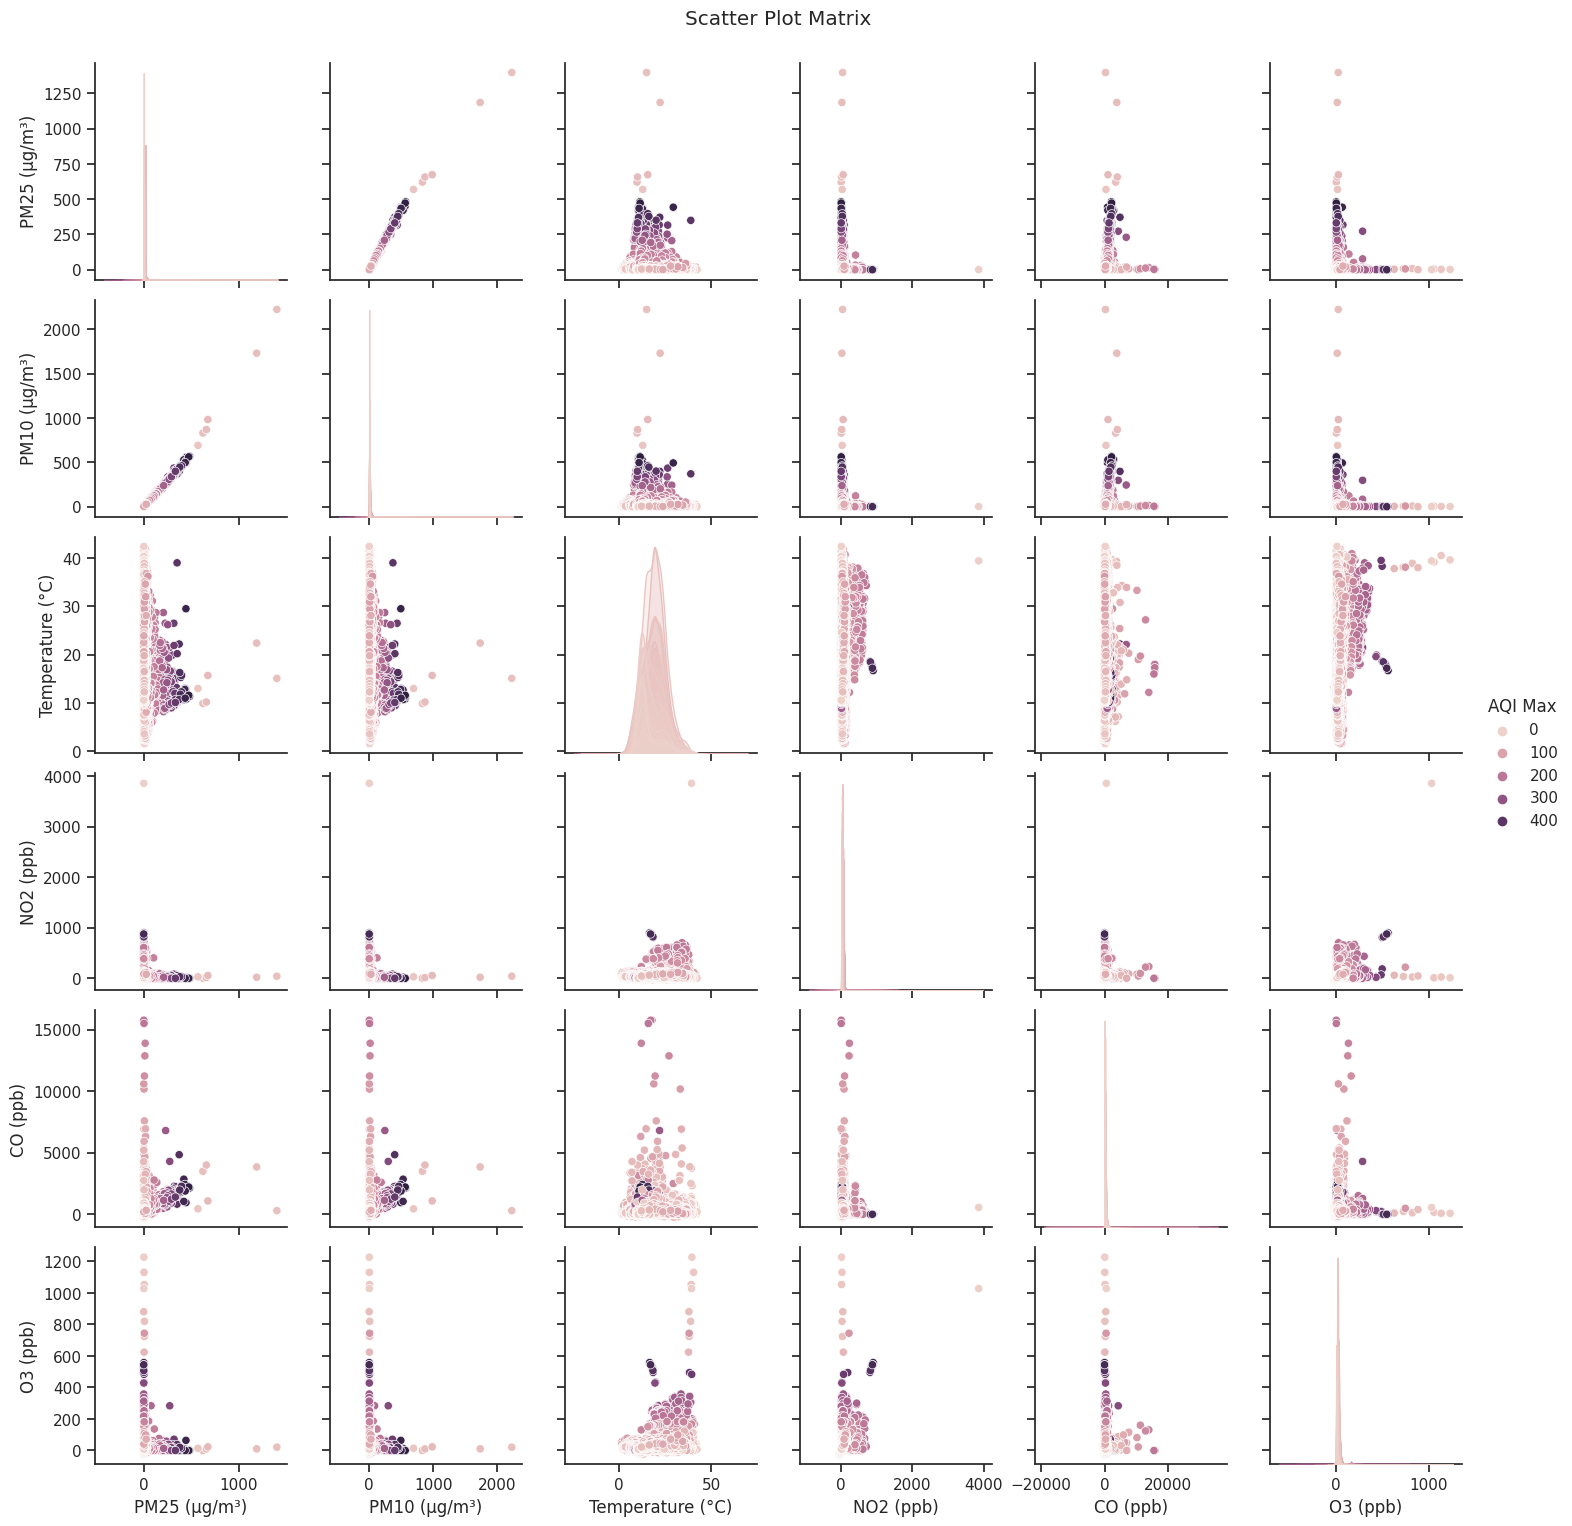

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

In [ ]:
# Scatter plot matrix
sns.set(style="ticks")
sns.pairplot(df, diag_kind="kde", markers="o", hue="AQI Max")
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()

# Individual scatter plots
plt.figure(figsize=(16, 10))

Text(0.5, 1.0, 'PM25 vs AQI')

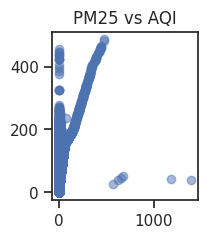

In [ ]:
plt.subplot(2, 3, 1)
plt.scatter(df["PM25 (µg/m³)"], df["AQI Max"], alpha=0.5)
plt.title("PM25 vs AQI")

Text(0.5, 1.0, 'PM10 vs AQI')

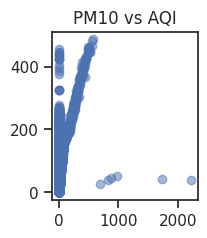

In [ ]:
plt.subplot(2, 3, 2)
plt.scatter(df["PM10 (µg/m³)"], df["AQI Max"], alpha=0.5)
plt.title("PM10 vs AQI")

Text(0.5, 1.0, 'Temperature vs AQI')

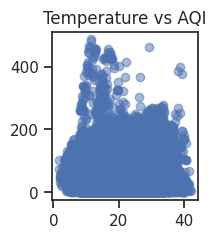

In [ ]:
plt.subplot(2, 3, 3)
plt.scatter(df["Temperature (°C)"], df["AQI Max"], alpha=0.5)
plt.title("Temperature vs AQI")

Text(0.5, 1.0, 'NO2 vs AQI')

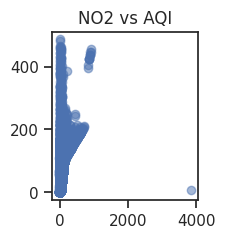

In [ ]:
plt.subplot(2, 3, 4)
plt.scatter(df["NO2 (ppb)"], df["AQI Max"], alpha=0.5)
plt.title("NO2 vs AQI")

Text(0.5, 1.0, 'CO vs AQI')

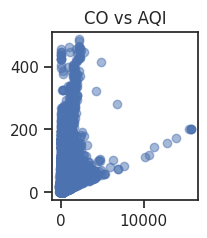

In [ ]:
plt.subplot(2, 3, 5)
plt.scatter(df["CO (ppb)"], df["AQI Max"], alpha=0.5)
plt.title("CO vs AQI")

Text(0.5, 1.0, 'O3 vs AQI')

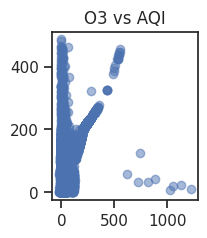

In [ ]:
plt.subplot(2, 3, 6)
plt.scatter(df["O3 (ppb)"], df["AQI Max"], alpha=0.5)
plt.title("O3 vs AQI")

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

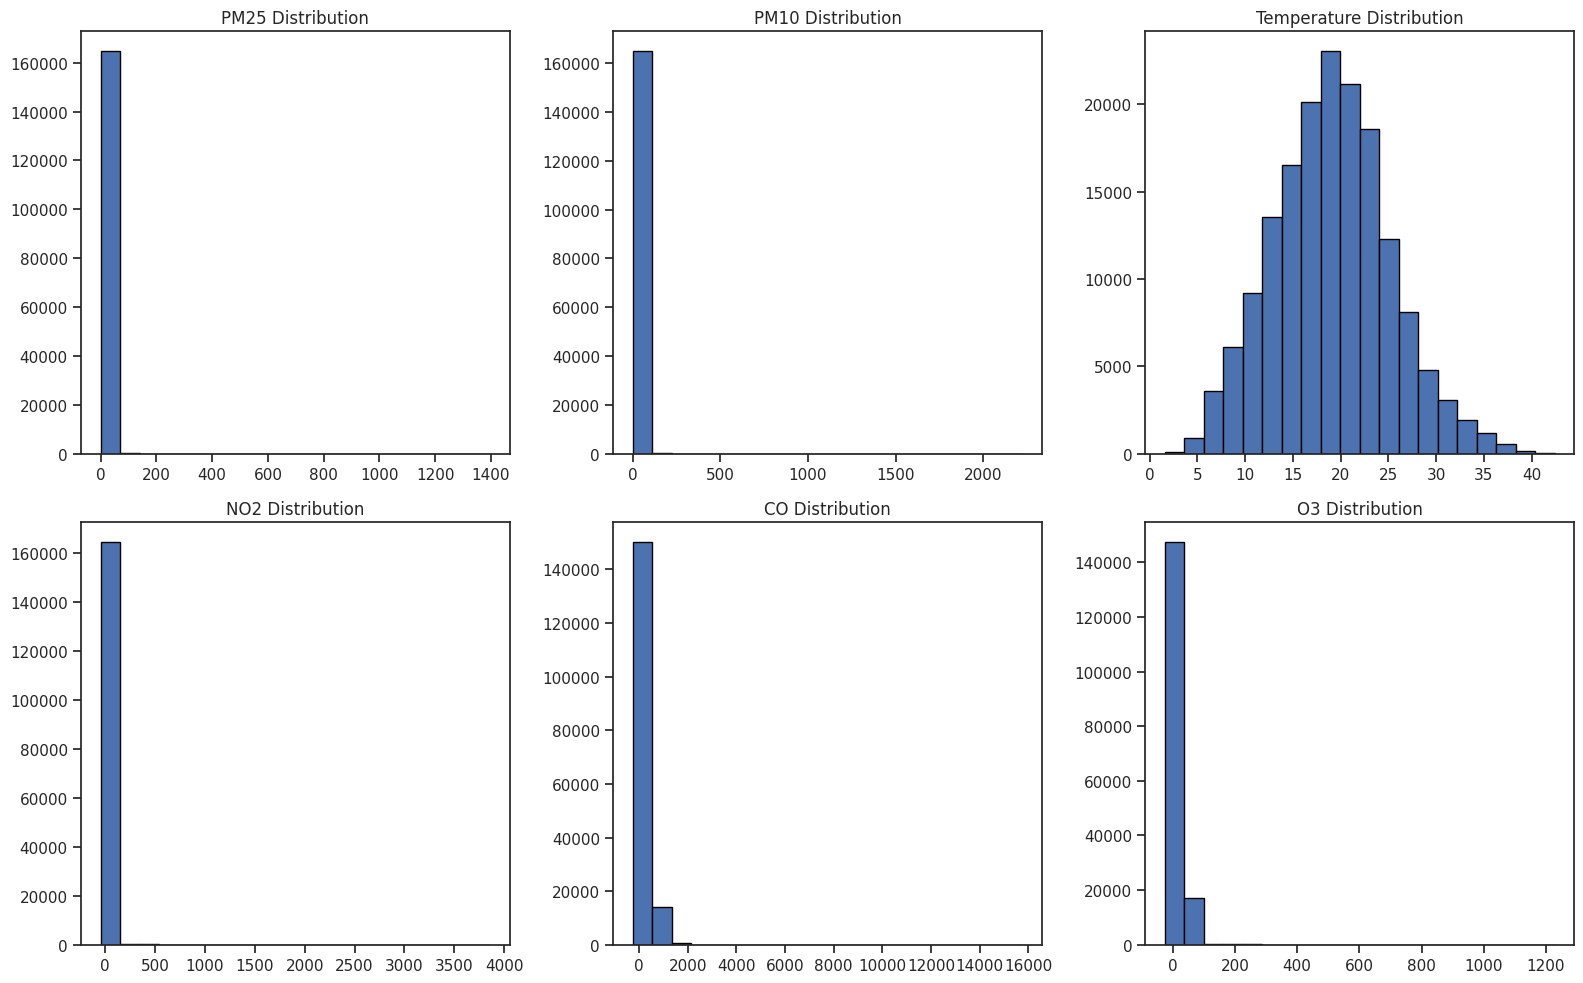

In [ ]:
# Histograms
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.hist(df["PM25 (µg/m³)"], bins=20, edgecolor="black")
plt.title("PM25 Distribution")

plt.subplot(2, 3, 2)
plt.hist(df["PM10 (µg/m³)"], bins=20, edgecolor="black")
plt.title("PM10 Distribution")

plt.subplot(2, 3, 3)
plt.hist(df["Temperature (°C)"], bins=20, edgecolor="black")
plt.title("Temperature Distribution")

plt.subplot(2, 3, 4)
plt.hist(df["NO2 (ppb)"], bins=20, edgecolor="black")
plt.title("NO2 Distribution")

plt.subplot(2, 3, 5)
plt.hist(df["CO (ppb)"], bins=20, edgecolor="black")
plt.title("CO Distribution")

plt.subplot(2, 3, 6)
plt.hist(df["O3 (ppb)"], bins=20, edgecolor="black")
plt.title("O3 Distribution")

plt.tight_layout()
plt.show()

In [ ]:
#finally, data preprocessing is done :)

In [ ]:
X = df.drop('AQI Max',axis=1)
y = df['AQI Max']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

def train_evaluate_model(model):
    # Train the model on the training set
    model.fit(X_train, y_train)

    # Training accuracy
    training_accuracy = model.score(X_train, y_train)
    print(f'Training Accuracy: {training_accuracy * 100:.2f}%')

    # Validation accuracy
    validation_accuracy = model.score(X_val, y_val)
    print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

    # Make predictions on the test set
    y_test_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_test_pred)
    print(f'R-squared on Test Set: {r2 * 100:.2f}%')

    # Test MSE
    test_mse = mean_squared_error(y_test, y_test_pred)
    print(f'Test MSE: {test_mse:.2f}')

    # Visualize the difference between actual and predicted values on the test set
    plt.figure(figsize=(12, 6))
    sns.histplot(y_test - y_test_pred, kde=True)
    plt.title(f'Test Set - Actual vs Predicted ({model.__class__.__name__})')
    plt.xlabel('Difference')
    plt.show()


Training Accuracy: 98.66%
Validation Accuracy: 98.16%
R-squared on Test Set: 98.02%
Test MSE: 16.12


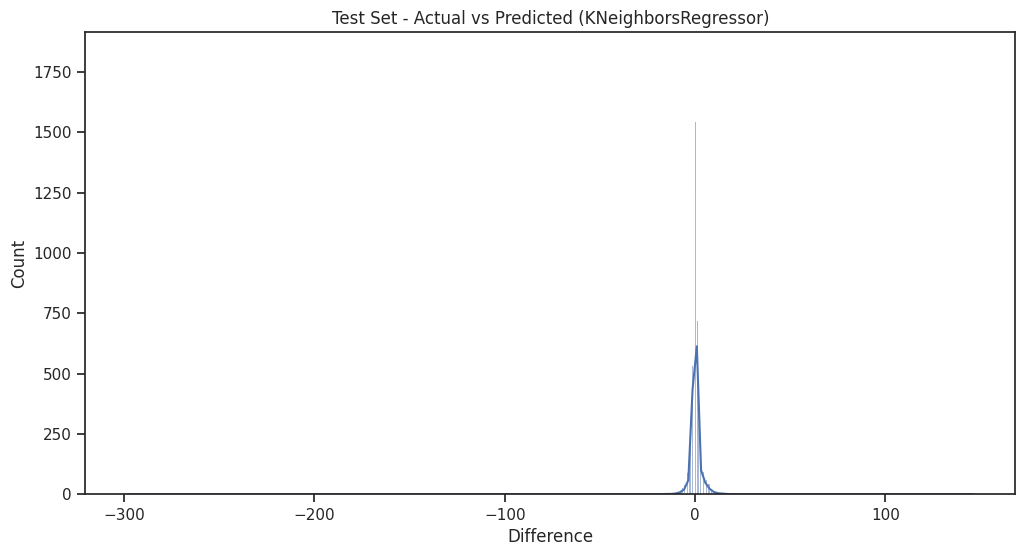

In [ ]:
train_evaluate_model(KNeighborsRegressor())

Training Accuracy: 75.82%
Validation Accuracy: 71.92%
R-squared on Test Set: 79.27%
Test MSE: 169.06


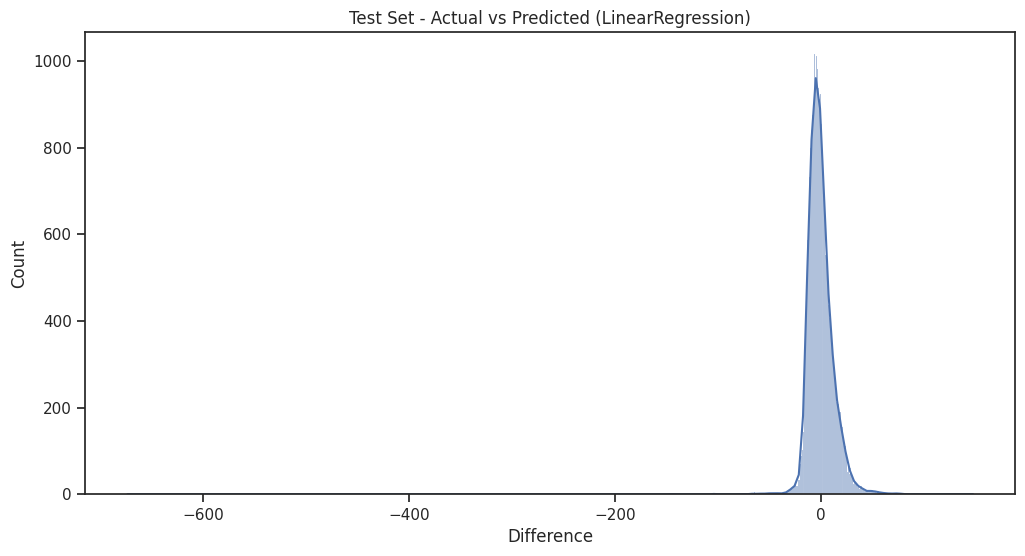

In [ ]:
train_evaluate_model(LinearRegression())

Training Accuracy: 100.00%
Validation Accuracy: 99.44%
R-squared on Test Set: 98.11%
Test MSE: 15.39


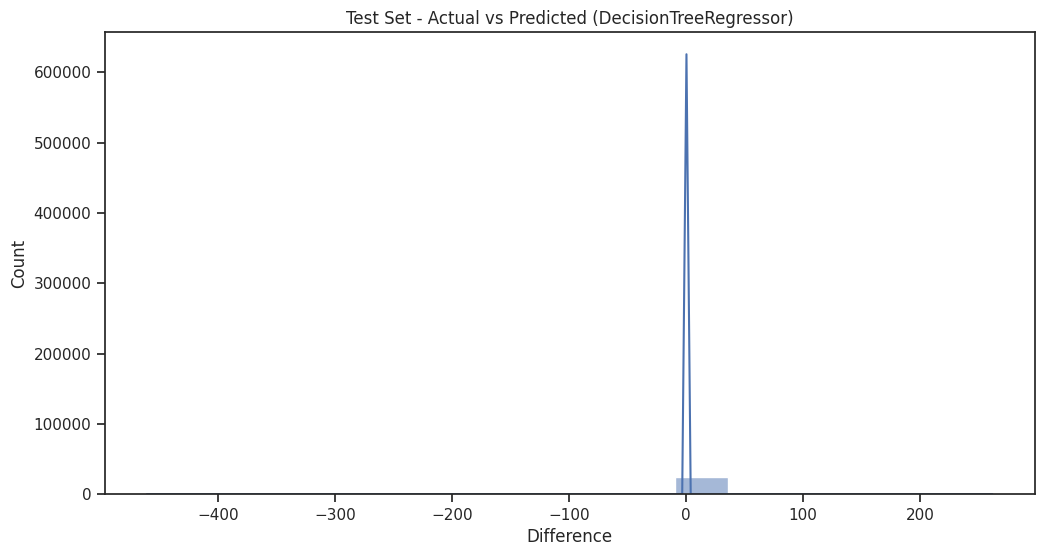

In [ ]:
train_evaluate_model(DecisionTreeRegressor())

Training Accuracy: 99.92%
Validation Accuracy: 99.46%
R-squared on Test Set: 98.65%
Test MSE: 11.00


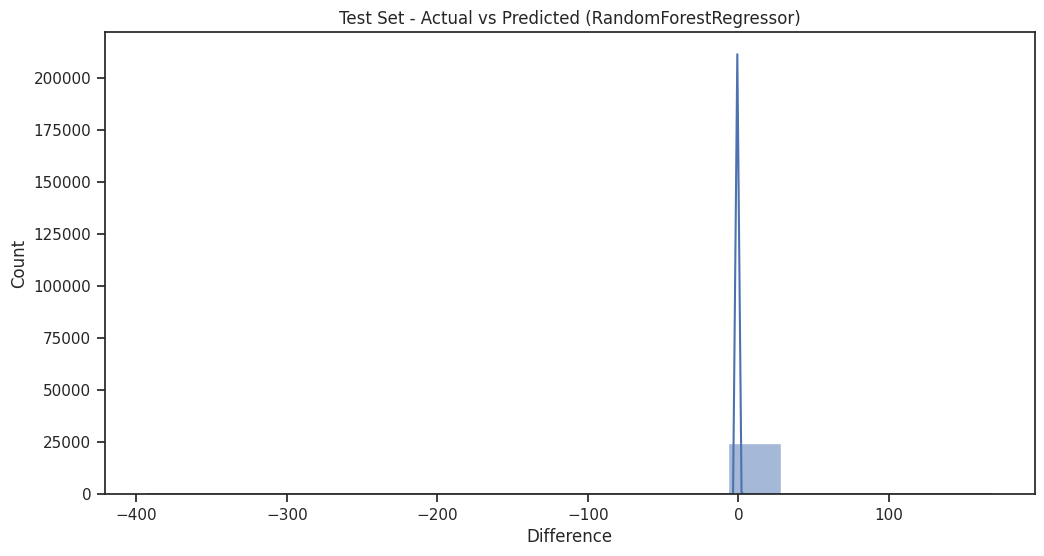

In [ ]:
train_evaluate_model(RandomForestRegressor())

Training Accuracy: 82.96%
Validation Accuracy: 84.27%
R-squared on Test Set: 83.15%
Test MSE: 137.42


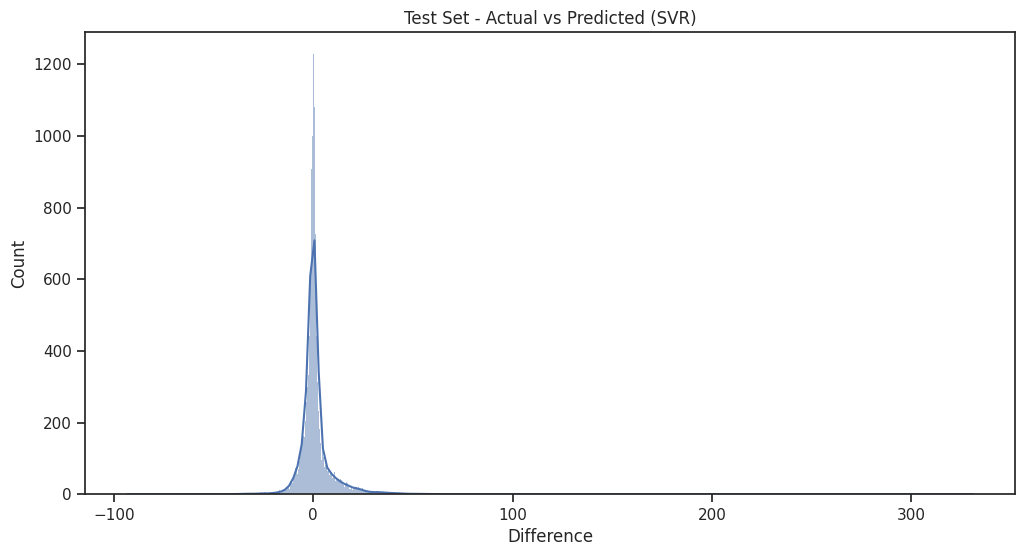

In [ ]:
train_evaluate_model(SVR())